<a href="https://colab.research.google.com/github/suresh-venkate/Code_Repositories/blob/main/Deep_Learning/Experiments/VIT/test_vit.py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !git clone https://github.com/lucidrains/vit-pytorch.git

In [ ]:
# %cd vit-pytorch/

In [ ]:
# !ls

In [ ]:
# !pip install einops

In [ ]:
# import torch
# from vit_pytorch import ViT

In [ ]:
# v = ViT(
#     image_size = 256,
#     patch_size = 32,
#     num_classes = 1000,
#     dim = 1024,
#     depth = 6,
#     heads = 16,
#     mlp_dim = 2048,
#     dropout = 0.1,
#     emb_dropout = 0.1
# )

# img = torch.randn(1, 3, 256, 256)

# preds = v(img) # (1, 1000)

In [ ]:
# label_pred = preds.argmax(dim = 1).cpu().numpy()[0] 
# label_pred

In [ ]:
# import matplotlib.pyplot as plt

In [ ]:
# img_plot = img.squeeze().permute(1, 2, 0)
# plt.imshow(img_plot)

In [ ]:
# import requests

In [ ]:
# url = "https://thumbs.dreamstime.com/z/golden-retriever-dog-21668976.jpg"
# response = requests.get(url)
# file = open("sample_image.png", "wb")
# file.write(response.content)
# file.close()

In [ ]:
# import cv2

In [ ]:
# img = cv2.imread("sample_image.png", cv2.IMREAD_COLOR) # Load image using cv2 as a 3-channel RGB image
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert image to RGB

In [ ]:
# from torchvision.transforms import ToTensor, Normalize, Compose, Resize
# img_transf = Compose([ToTensor(), Resize((256, 256))])
# img_aug = img_transf(img)

In [ ]:
# img_plot = img_aug.squeeze().permute(1, 2, 0)
# plt.imshow(img_plot)
# plt.show()

In [ ]:
# img_aug.unsqueeze(0).shape

In [ ]:
# preds = v(img_aug.unsqueeze(0))
# label_pred = preds.argmax(dim = 1).cpu().numpy()[0] 
# label_pred

In [2]:
!git clone https://github.com/rwightman/pytorch-image-models.git

Cloning into 'pytorch-image-models'...
remote: Enumerating objects: 7606, done.
remote: Counting objects: 100% (2198/2198), done.
remote: Compressing objects: 100% (482/482), done.
remote: Total 7606 (delta 1887), reused 1733 (delta 1715), pack-reused 5408
Receiving objects: 100% (7606/7606), 17.44 MiB | 12.38 MiB/s, done.
Resolving deltas: 100% (5625/5625), done.


In [4]:
%cd pytorch-image-models
import timm

/content/pytorch-image-models


In [ ]:
model = timm.create_model('vit_base_patch16_224', pretrained=True)
model.eval()

In [20]:
import urllib
from PIL import Image
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

config = resolve_data_config({}, model=model)
transform = create_transform(**config)

#url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
url, filename = ("https://www.mumbailive.com/images/news/images_1525858231156_bullet_train.jpg", "temp.jpg")
urllib.request.urlretrieve(url, filename)
img = Image.open(filename).convert('RGB')
tensor = transform(img).unsqueeze(0) # transform and add batch dimension

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:281: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


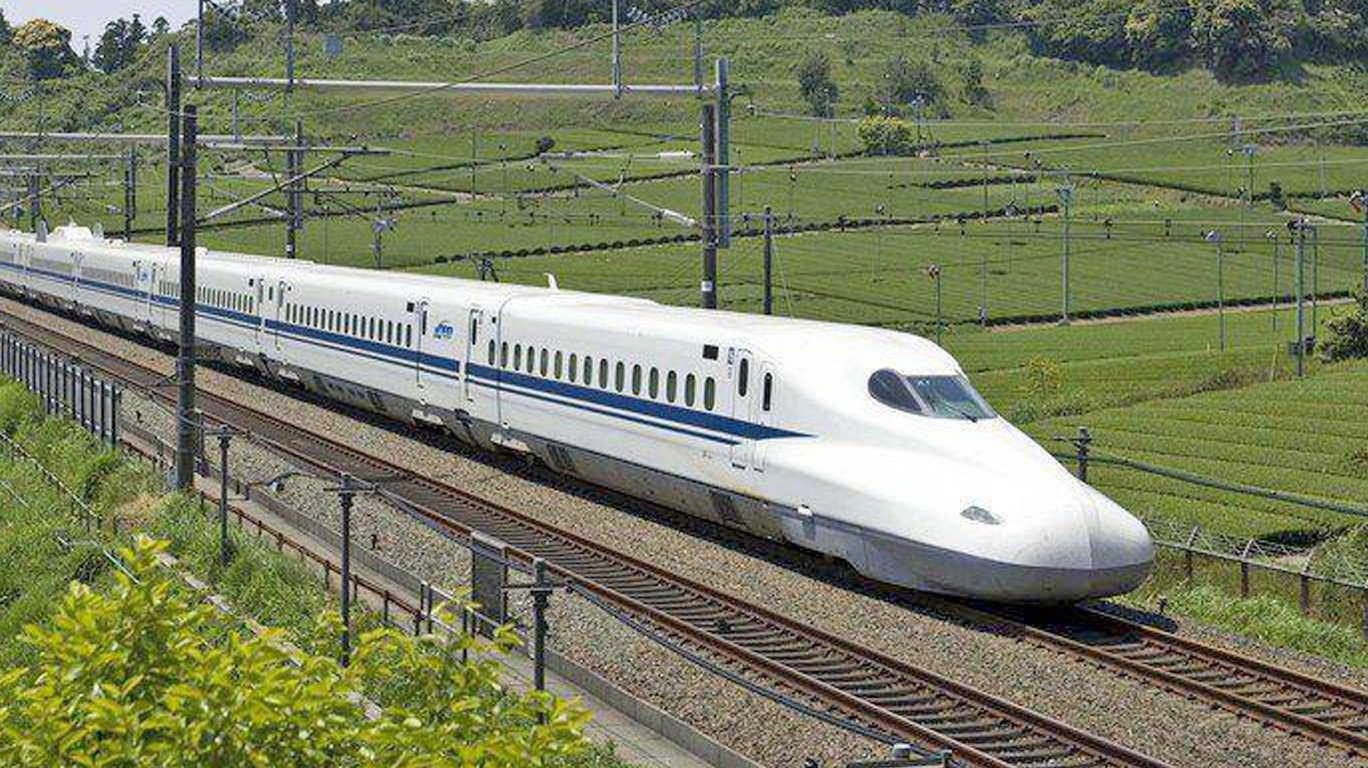

In [21]:
img

In [22]:
import torch
with torch.no_grad():
    out = model(tensor)
probabilities = torch.nn.functional.softmax(out[0], dim=0)
print(probabilities.argmax())
print(probabilities[probabilities.argmax()])

tensor(466)
tensor(0.9926)
